In [45]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [46]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [47]:
NUM_CLASSES = 7

# 学習データ読み込み

In [48]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [49]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [51]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [52]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_4 (Dropout)          (None, 42)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 20)                860       
_________________________________________________________________
dropout_5 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_8 (Dense)              (None, 7)                 77        
Total params: 1,147
Trainable params: 1,147
Non-trainable params: 0
_________________________________________________________________


In [53]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [54]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [55]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
2/2 [==============================] - 0s 116ms/step - loss: 2.0744 - accuracy: 0.1618 - val_loss: 1.9971 - val_accuracy: 0.1642

Epoch 00001: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 2/1000
2/2 [==============================] - 0s 24ms/step - loss: 2.1176 - accuracy: 0.1298 - val_loss: 1.9808 - val_accuracy: 0.1940

Epoch 00002: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 3/1000
2/2 [==============================] - 0s 25ms/step - loss: 2.0447 - accuracy: 0.1469 - val_loss: 1.9668 - val_accuracy: 0.2239

Epoch 00003: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 4/1000
2/2 [==============================] - 0s 22ms/step - loss: 1.9921 - accuracy: 0.1640 - val_loss: 1.9550 - val_accuracy: 0.2090

Epoch 00004: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 5/1000
2/2 [==============================] - 0s 23ms/step - loss: 2.0078 - accuracy: 0.2181 - val_loss: 

2/2 [==============================] - 0s 24ms/step - loss: 1.8347 - accuracy: 0.2890 - val_loss: 1.8197 - val_accuracy: 0.2836

Epoch 00038: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 39/1000
2/2 [==============================] - 0s 23ms/step - loss: 1.8913 - accuracy: 0.2233 - val_loss: 1.8176 - val_accuracy: 0.2836

Epoch 00039: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 40/1000
2/2 [==============================] - 0s 21ms/step - loss: 1.8544 - accuracy: 0.2600 - val_loss: 1.8156 - val_accuracy: 0.2985

Epoch 00040: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 41/1000
2/2 [==============================] - 0s 24ms/step - loss: 1.8490 - accuracy: 0.2567 - val_loss: 1.8134 - val_accuracy: 0.2985

Epoch 00041: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 42/1000
2/2 [==============================] - 0s 23ms/step - loss: 1.8109 - accuracy: 0.2778 - val_loss: 1.8111 - v

2/2 [==============================] - 0s 22ms/step - loss: 1.6980 - accuracy: 0.3268 - val_loss: 1.5994 - val_accuracy: 0.4925

Epoch 00075: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 76/1000
2/2 [==============================] - 0s 24ms/step - loss: 1.7014 - accuracy: 0.3631 - val_loss: 1.5925 - val_accuracy: 0.4925

Epoch 00076: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 77/1000
2/2 [==============================] - 0s 25ms/step - loss: 1.6969 - accuracy: 0.3375 - val_loss: 1.5855 - val_accuracy: 0.4925

Epoch 00077: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 78/1000
2/2 [==============================] - 0s 21ms/step - loss: 1.7204 - accuracy: 0.3279 - val_loss: 1.5789 - val_accuracy: 0.4925

Epoch 00078: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 79/1000
2/2 [==============================] - 0s 23ms/step - loss: 1.7119 - accuracy: 0.3130 - val_loss: 1.5730 - v

2/2 [==============================] - 0s 22ms/step - loss: 1.5253 - accuracy: 0.3857 - val_loss: 1.3110 - val_accuracy: 0.6269

Epoch 00112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 113/1000
2/2 [==============================] - 0s 22ms/step - loss: 1.5316 - accuracy: 0.4169 - val_loss: 1.3022 - val_accuracy: 0.6269

Epoch 00113: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 114/1000
2/2 [==============================] - 0s 21ms/step - loss: 1.4626 - accuracy: 0.4774 - val_loss: 1.2938 - val_accuracy: 0.6269

Epoch 00114: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 115/1000
2/2 [==============================] - 0s 22ms/step - loss: 1.4438 - accuracy: 0.4373 - val_loss: 1.2853 - val_accuracy: 0.6418

Epoch 00115: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 116/1000
2/2 [==============================] - 0s 21ms/step - loss: 1.5848 - accuracy: 0.3809 - val_loss: 1.2778

Epoch 149/1000
2/2 [==============================] - 0s 22ms/step - loss: 1.3303 - accuracy: 0.5304 - val_loss: 1.0393 - val_accuracy: 0.8507

Epoch 00149: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 150/1000
2/2 [==============================] - 0s 23ms/step - loss: 1.2579 - accuracy: 0.5464 - val_loss: 1.0332 - val_accuracy: 0.8507

Epoch 00150: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 151/1000
2/2 [==============================] - 0s 22ms/step - loss: 1.3188 - accuracy: 0.4981 - val_loss: 1.0270 - val_accuracy: 0.8657

Epoch 00151: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 152/1000
2/2 [==============================] - 0s 22ms/step - loss: 1.2954 - accuracy: 0.5211 - val_loss: 1.0206 - val_accuracy: 0.8657

Epoch 00152: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 153/1000
2/2 [==============================] - 0s 24ms/step - loss: 1.2705 - accuracy: 0.5490 - v


Epoch 00185: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 186/1000
2/2 [==============================] - 0s 23ms/step - loss: 1.1327 - accuracy: 0.5808 - val_loss: 0.8148 - val_accuracy: 0.9254

Epoch 00186: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 187/1000
2/2 [==============================] - 0s 22ms/step - loss: 1.1463 - accuracy: 0.5705 - val_loss: 0.8092 - val_accuracy: 0.9254

Epoch 00187: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 188/1000
2/2 [==============================] - 0s 22ms/step - loss: 1.1634 - accuracy: 0.5720 - val_loss: 0.8039 - val_accuracy: 0.9254

Epoch 00188: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 189/1000
2/2 [==============================] - 0s 23ms/step - loss: 1.1733 - accuracy: 0.5582 - val_loss: 0.7988 - val_accuracy: 0.9254

Epoch 00189: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 190/1000
2/2 [===

2/2 [==============================] - 0s 22ms/step - loss: 0.9854 - accuracy: 0.6179 - val_loss: 0.6691 - val_accuracy: 0.9254

Epoch 00222: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 223/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.9882 - accuracy: 0.6079 - val_loss: 0.6646 - val_accuracy: 0.9254

Epoch 00223: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 224/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.9993 - accuracy: 0.6169 - val_loss: 0.6603 - val_accuracy: 0.9254

Epoch 00224: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 225/1000
2/2 [==============================] - 0s 22ms/step - loss: 1.0449 - accuracy: 0.6091 - val_loss: 0.6560 - val_accuracy: 0.9254

Epoch 00225: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 226/1000
2/2 [==============================] - 0s 22ms/step - loss: 1.1079 - accuracy: 0.5675 - val_loss: 0.6522

Epoch 259/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.9701 - accuracy: 0.6288 - val_loss: 0.5720 - val_accuracy: 0.9254

Epoch 00259: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 260/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.9831 - accuracy: 0.6209 - val_loss: 0.5694 - val_accuracy: 0.9254

Epoch 00260: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 261/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.9995 - accuracy: 0.6424 - val_loss: 0.5669 - val_accuracy: 0.9254

Epoch 00261: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 262/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.9363 - accuracy: 0.6395 - val_loss: 0.5643 - val_accuracy: 0.9254

Epoch 00262: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 263/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.9672 - accuracy: 0.6057 - v


Epoch 00295: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 296/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.9609 - accuracy: 0.6217 - val_loss: 0.4800 - val_accuracy: 0.9254

Epoch 00296: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 297/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.9433 - accuracy: 0.6461 - val_loss: 0.4776 - val_accuracy: 0.9254

Epoch 00297: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 298/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.9272 - accuracy: 0.6509 - val_loss: 0.4756 - val_accuracy: 0.9254

Epoch 00298: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 299/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.9547 - accuracy: 0.6231 - val_loss: 0.4736 - val_accuracy: 0.9254

Epoch 00299: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 300/1000
2/2 [===

2/2 [==============================] - 0s 22ms/step - loss: 0.8741 - accuracy: 0.6632 - val_loss: 0.4341 - val_accuracy: 0.9552

Epoch 00332: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 333/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.7960 - accuracy: 0.6654 - val_loss: 0.4307 - val_accuracy: 0.9552

Epoch 00333: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 334/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.8476 - accuracy: 0.6666 - val_loss: 0.4271 - val_accuracy: 0.9552

Epoch 00334: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 335/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.9037 - accuracy: 0.6250 - val_loss: 0.4244 - val_accuracy: 0.9552

Epoch 00335: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 336/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.8990 - accuracy: 0.6521 - val_loss: 0.4219

Epoch 369/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.8042 - accuracy: 0.6918 - val_loss: 0.3798 - val_accuracy: 0.9552

Epoch 00369: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 370/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.9555 - accuracy: 0.6257 - val_loss: 0.3788 - val_accuracy: 0.9701

Epoch 00370: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 371/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.9267 - accuracy: 0.6034 - val_loss: 0.3778 - val_accuracy: 0.9701

Epoch 00371: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 372/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.8350 - accuracy: 0.6844 - val_loss: 0.3767 - val_accuracy: 0.9701

Epoch 00372: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 373/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.8158 - accuracy: 0.6721 - v


Epoch 00405: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 406/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.7400 - accuracy: 0.7348 - val_loss: 0.3425 - val_accuracy: 0.9701

Epoch 00406: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 407/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.8236 - accuracy: 0.7129 - val_loss: 0.3408 - val_accuracy: 0.9701

Epoch 00407: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 408/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.9153 - accuracy: 0.6387 - val_loss: 0.3393 - val_accuracy: 0.9701

Epoch 00408: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 409/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.7566 - accuracy: 0.7162 - val_loss: 0.3379 - val_accuracy: 0.9701

Epoch 00409: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 410/1000
2/2 [===

2/2 [==============================] - 0s 23ms/step - loss: 0.7089 - accuracy: 0.7403 - val_loss: 0.3094 - val_accuracy: 0.9701

Epoch 00442: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 443/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.8721 - accuracy: 0.6595 - val_loss: 0.3089 - val_accuracy: 0.9701

Epoch 00443: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 444/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.7124 - accuracy: 0.7519 - val_loss: 0.3085 - val_accuracy: 0.9701

Epoch 00444: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 445/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.8188 - accuracy: 0.6832 - val_loss: 0.3086 - val_accuracy: 0.9701

Epoch 00445: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 446/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.8584 - accuracy: 0.6825 - val_loss: 0.3080

Epoch 479/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.7325 - accuracy: 0.7348 - val_loss: 0.2925 - val_accuracy: 0.9851

Epoch 00479: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 480/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.7528 - accuracy: 0.7389 - val_loss: 0.2916 - val_accuracy: 0.9851

Epoch 00480: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 481/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.6638 - accuracy: 0.7215 - val_loss: 0.2905 - val_accuracy: 0.9851

Epoch 00481: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 482/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.8439 - accuracy: 0.6799 - val_loss: 0.2898 - val_accuracy: 0.9851

Epoch 00482: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 483/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.6811 - accuracy: 0.7507 - v


Epoch 00515: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 516/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.7953 - accuracy: 0.7084 - val_loss: 0.2735 - val_accuracy: 0.9851

Epoch 00516: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 517/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.7315 - accuracy: 0.7155 - val_loss: 0.2746 - val_accuracy: 0.9851

Epoch 00517: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 518/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.7576 - accuracy: 0.7151 - val_loss: 0.2757 - val_accuracy: 0.9851

Epoch 00518: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 519/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.7129 - accuracy: 0.7144 - val_loss: 0.2773 - val_accuracy: 0.9851

Epoch 00519: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 520/1000
2/2 [===

2/2 [==============================] - 0s 23ms/step - loss: 0.6694 - accuracy: 0.7619 - val_loss: 0.2531 - val_accuracy: 0.9851

Epoch 00552: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 553/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.7765 - accuracy: 0.6918 - val_loss: 0.2527 - val_accuracy: 0.9851

Epoch 00553: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 554/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.6966 - accuracy: 0.7507 - val_loss: 0.2530 - val_accuracy: 0.9851

Epoch 00554: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 555/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.6986 - accuracy: 0.7329 - val_loss: 0.2524 - val_accuracy: 0.9851

Epoch 00555: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 556/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.6858 - accuracy: 0.7329 - val_loss: 0.2520

2/2 [==============================] - 0s 23ms/step - loss: 0.6961 - accuracy: 0.7322 - val_loss: 0.2415 - val_accuracy: 0.9851

Epoch 00589: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 590/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.7957 - accuracy: 0.6825 - val_loss: 0.2418 - val_accuracy: 0.9851

Epoch 00590: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 591/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.7014 - accuracy: 0.7493 - val_loss: 0.2423 - val_accuracy: 0.9851

Epoch 00591: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 592/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.7441 - accuracy: 0.7545 - val_loss: 0.2429 - val_accuracy: 0.9851

Epoch 00592: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 593/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.7173 - accuracy: 0.7530 - val_loss: 0.2437

In [56]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

1/1 [==============================] - 0s 11ms/step - loss: 0.2415 - accuracy: 0.9851


In [57]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [58]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[0.00964802 0.02674959 0.7249167  0.01509746 0.08165903 0.00321751
 0.13871169]
2


# 混同行列

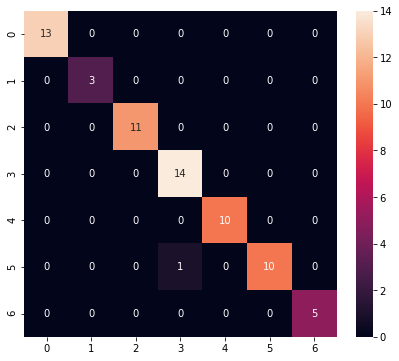

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00        11
           3       0.93      1.00      0.97        14
           4       1.00      1.00      1.00        10
           5       1.00      0.91      0.95        11
           6       1.00      1.00      1.00         5

    accuracy                           0.99        67
   macro avg       0.99      0.99      0.99        67
weighted avg       0.99      0.99      0.98        67



In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [60]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [61]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\s3a1\AppData\Local\Temp\tmpow1xut58\assets


INFO:tensorflow:Assets written to: C:\Users\s3a1\AppData\Local\Temp\tmpow1xut58\assets


6544

# 推論テスト

In [62]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [63]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [64]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [65]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 0 ns


In [66]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.00964802 0.02674958 0.7249169  0.01509746 0.08165901 0.00321751
 0.1387117 ]
2
